# IAI - Assignment 1 - Clustering and Classification

### Import all necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Data Preparation and feature selection

In [6]:
# Load data and remove first row after column headers
analytic_df = pd.read_csv('analytic_data2024.csv')
analytic_df = analytic_df.drop(analytic_df.index[0])
analytic_df.head(10)

<ipython-input-6-08b6f0214143>:2: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Clustered (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,...,% Female raw value,% Female numerator,% Female denominator,% Female CI low,% Female CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
1,00,000,00000,US,United States,2024,NaN,7971.5097891,4535347,921750763,...,0.504081237,168004004,333287557,NaN,NaN,0.2000313707,66300254,331449281,NaN,NaN
2,01,000,01000,AL,Alabama,2024,NaN,11415.734833,98140,13812804,...,0.5137532379,2606936,5074296,NaN,NaN,0.4226276049,2123399,5024279,NaN,NaN
3,01,001,01001,AL,Autauga County,2024,1,9407.9484384,942,159452,...,0.5129603909,30654,59759,NaN,NaN,0.406768132,23920,58805,NaN,NaN
4,01,003,01003,AL,Baldwin County,2024,1,8981.5753533,3789,633571,...,0.5123906913,126271,246435,NaN,NaN,0.3758645536,87113,231767,NaN,NaN
5,01,005,01005,AL,Barbour County,2024,1,13138.848362,579,68114,...,0.4712215656,11642,24706,NaN,NaN,0.6591999366,16627,25223,NaN,NaN
6,01,007,01007,AL,Bibb County,2024,1,12675.434581,501,62383,...,0.4648943422,10230,22005,NaN,NaN,1,22293,22293,NaN,NaN
7,01,009,01009,AL,Blount County,2024,1,11541.495069,1239,161231,...,0.5029069767,29929,59512,NaN,NaN,0.9048939696,53510,59134,NaN,NaN
8,01,011,01011,AL,Bullock County,2024,1,13837.899207,229,28217,...,0.4458929622,4549,10202,NaN,NaN,1,10357,10357,NaN,NaN
9,01,013,01013,AL,Butler County,2024,1,12718.633185,449,52411,...,0.530080429,9886,18650,NaN,NaN,0.6943467535,13228,19051,NaN,NaN
10,01,015,01015,AL,Calhoun County,2024,1,13197.258124,2735,318377,...,0.5135851729,59467,115788,NaN,NaN,0.3649401843,42494,116441,NaN,NaN


In [7]:
# Create list of selected measures from Analytic Documentation, required columns are categorical attributes for granularity
selected_outcome = ['Premature Death']
selected_features = [ 'Adult Smoking', 'Adult Obesity','Food Environment Index','Physical Inactivity','Access to Exercise Opportunities','Excessive Drinking','Alcohol-Impaired Driving Deaths',
                     'Sexually Transmitted Infections', 'Teen Births', 'Uninsured', 'Primary Care Physicians','Dentists', 'Mental Health Providers','Preventable Hospital Stays',
                     'Mammography Screening','Flu Vaccinations','High School Completion', 'Some College', 'Unemployment','Children in Poverty', 'Income Inequality',
                     'Children in Single-Parent Households','Social Associations', 'Injury Deaths', 'Air Pollution - Particulate Matter', 'Drinking Water Violations',
                     'Severe Housing Problems', 'Driving Alone to Work','Long Commute - Driving Alone']

categorical_columns = ['5-digit FIPS Code', 'State Abbreviation', 'Name', 'County Clustered (Yes=1/No=0)']

# Total Analytical dataset - categorical cols + outcomes + features
analytical_dataset = analytic_df[categorical_columns + [col for col in analytic_df.columns if any((phrase in col and 'value' in col) for phrase in selected_outcome + selected_features)]]

# Feature selection - choose only categorical cols + features
analytical_featureset = analytical_dataset[categorical_columns + [col for col in analytical_dataset.columns if any(phrase in col for phrase in selected_features)]]

# Check the granularity of data post all operations
analytic_df.shape, analytical_dataset.shape, analytical_featureset.shape, analytical_dataset[categorical_columns].drop_duplicates().shape

((3195, 770), (3195, 36), (3195, 35), (3195, 4))

### Exploratory Data Analysis

In [8]:
#Dataset information
analytical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 1 to 3195
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   5-digit FIPS Code                               3195 non-null   object
 1   State Abbreviation                              3195 non-null   object
 2   Name                                            3195 non-null   object
 3   County Clustered (Yes=1/No=0)                   3143 non-null   object
 4   Premature Death raw value                       3140 non-null   object
 5   Adult Smoking raw value                         3195 non-null   object
 6   Adult Obesity raw value                         3195 non-null   object
 7   Food Environment Index raw value                3160 non-null   object
 8   Physical Inactivity raw value                   3195 non-null   object
 9   Access to Exercise Opportunities raw value      3150

#### Inference - all features are of object type and need to be cast to numeric type

In [9]:
# Casting outcome and feature columns to numeric type
numeric_columns = [col for col in analytical_dataset.columns if col not in categorical_columns]
analytical_dataset[numeric_columns] = analytical_dataset[numeric_columns].apply(pd.to_numeric)
analytical_dataset[categorical_columns] = analytical_dataset[categorical_columns].astype('category')
analytical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 1 to 3195
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   5-digit FIPS Code                               3195 non-null   category
 1   State Abbreviation                              3195 non-null   category
 2   Name                                            3195 non-null   category
 3   County Clustered (Yes=1/No=0)                   3143 non-null   category
 4   Premature Death raw value                       3140 non-null   float64 
 5   Adult Smoking raw value                         3195 non-null   float64 
 6   Adult Obesity raw value                         3195 non-null   float64 
 7   Food Environment Index raw value                3160 non-null   float64 
 8   Physical Inactivity raw value                   3195 non-null   float64 
 9   Access to Exercise Opportuniti

<ipython-input-9-c5e78c9ba608>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analytical_dataset[numeric_columns] = analytical_dataset[numeric_columns].apply(pd.to_numeric)
<ipython-input-9-c5e78c9ba608>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analytical_dataset[categorical_columns] = analytical_dataset[categorical_columns].astype('category')


In [10]:
# Repeating same treatment for feaureset
feature_columns = [col for col in analytical_featureset.columns if col not in categorical_columns]
analytical_featureset[feature_columns] = analytical_featureset[feature_columns].apply(pd.to_numeric)
analytical_featureset[categorical_columns] = analytical_featureset[categorical_columns].astype('category')
analytical_featureset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 1 to 3195
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   5-digit FIPS Code                               3195 non-null   category
 1   State Abbreviation                              3195 non-null   category
 2   Name                                            3195 non-null   category
 3   County Clustered (Yes=1/No=0)                   3143 non-null   category
 4   Adult Smoking raw value                         3195 non-null   float64 
 5   Adult Obesity raw value                         3195 non-null   float64 
 6   Food Environment Index raw value                3160 non-null   float64 
 7   Physical Inactivity raw value                   3195 non-null   float64 
 8   Access to Exercise Opportunities raw value      3150 non-null   float64 
 9   Excessive Drinking raw value  

<ipython-input-10-eb9d9ace1b52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analytical_featureset[feature_columns] = analytical_featureset[feature_columns].apply(pd.to_numeric)
<ipython-input-10-eb9d9ace1b52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analytical_featureset[categorical_columns] = analytical_featureset[categorical_columns].astype('category')


In [11]:
# Summary statistics of dataframe
analytical_dataset.describe()

,Premature Death raw value,Adult Smoking raw value,Adult Obesity raw value,Food Environment Index raw value,Physical Inactivity raw value,Access to Exercise Opportunities raw value,Excessive Drinking raw value,Alcohol-Impaired Driving Deaths raw value,Sexually Transmitted Infections raw value,Teen Births raw value,...,Children in Single-Parent Households raw value,Social Associations raw value,Injury Deaths raw value,Air Pollution - Particulate Matter raw value,Drinking Water Violations raw value,Severe Housing Problems raw value,Driving Alone to Work raw value,Long Commute - Driving Alone raw value,Uninsured Adults raw value,Uninsured Children raw value
count,3140.000000,3195.000000,3195.000000,3160.000000,3195.000000,3150.000000,3195.000000,3168.000000,3049.000000,2979.000000,...,3194.000000,3195.000000,3089.000000,3167.000000,3141.000000,3195.000000,3195.000000,3195.000000,3194.000000,3194.000000
mean,9825.681770,0.189786,0.372916,7.542753,0.266026,0.619566,0.168951,0.273318,389.320925,22.985817,...,0.239055,11.282951,96.064250,7.526681,0.369878,0.128526,0.776228,0.329879,0.135024,0.065113
std,3466.710219,0.041101,0.045761,1.199698,0.052295,0.230316,0.026347,0.151209,269.064371,11.546996,...,0.102010,5.828191,28.492347,1.712293,0.479699,0.044015,0.077844,0.126567,0.062819,0.036340
min,2418.325248,0.070000,0.174000,0.000000,0.120000,0.000000,0.090381,0.000000,0.000000,1.557741,...,0.000000,0.000000,26.625917,0.900000,0.000000,0.000000,0.056684,0.000000,0.027778,0.006849
25%,7413.315982,0.164000,0.350000,6.900000,0.230000,0.476384,0.150668,0.181818,216.100000,14.358362,...,0.171802,7.891607,76.827514,6.500000,0.000000,0.102110,0.749626,0.236000,0.086340,0.040737
50%,9344.028540,0.187000,0.376000,7.700000,0.262000,0.645077,0.169113,0.264706,314.500000,21.373797,...,0.222449,10.767424,93.510445,7.700000,0.000000,0.122521,0.788720,0.324000,0.120067,0.055132
75%,11674.780790,0.215000,0.402000,8.400000,0.300000,0.795322,0.185501,0.336385,498.000000,30.352779,...,0.286594,14.073308,110.953182,8.800000,1.000000,0.147780,0.822011,0.416500,0.172766,0.079258
max,41152.261127,0.430000,0.525000,10.000000,0.470000,1.000000,0.267978,1.000000,3467.600000,79.030977,...,0.785193,59.435364,315.568022,15.600000,1.000000,0.611429,0.975851,0.733000,0.470588,0.416667


In [12]:
analytical_categories = analytical_dataset[categorical_columns]
analytical_categories.describe()

,5-digit FIPS Code,State Abbreviation,Name,County Clustered (Yes=1/No=0)
count,3195,3195,3195,3143.0
unique,3195,52,1929,4.0
top,21021,TX,Washington County,1.0
freq,1,255,30,2098.0


##### Checking for columns with null values

In [13]:
## Single line function to check count of null values for each column of dataset
null_cols = analytical_dataset.isnull().sum().to_frame().T.rename(index={0: 'null_count'})

## Show only cols with null count > 0
null_cols[[col for col in null_cols.columns if null_cols[col].values[0] > 0]]

,County Clustered (Yes=1/No=0),Premature Death raw value,Food Environment Index raw value,Access to Exercise Opportunities raw value,Alcohol-Impaired Driving Deaths raw value,Sexually Transmitted Infections raw value,Teen Births raw value,Uninsured raw value,Primary Care Physicians raw value,Dentists raw value,...,Flu Vaccinations raw value,Unemployment raw value,Children in Poverty raw value,Income Inequality raw value,Children in Single-Parent Households raw value,Injury Deaths raw value,Air Pollution - Particulate Matter raw value,Drinking Water Violations raw value,Uninsured Adults raw value,Uninsured Children raw value
null_count,52,55,35,45,27,146,216,1,157,87,...,20,1,1,15,1,106,28,54,1,1


In [14]:
## As there are no columns with more than 7% of missing data, we can safely drop these records
analytical_dataset.dropna(inplace=True)
analytical_featureset.dropna(inplace=True)

## Show record count for both dataframes
analytical_dataset.shape, analytical_featureset.shape

<ipython-input-14-f17cef9db288>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analytical_dataset.dropna(inplace=True)
<ipython-input-14-f17cef9db288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analytical_featureset.dropna(inplace=True)


((2565, 36), (2565, 35))

#### Outlier analysis

Text(0.5, 1.0, 'Distribution of Premature Death Rates')

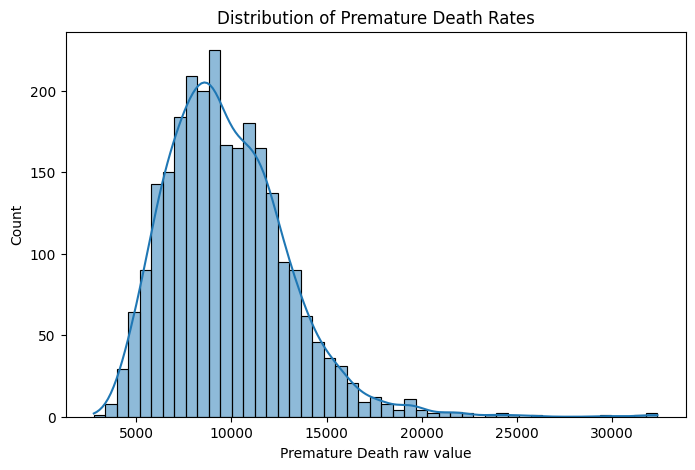

In [15]:
# Distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(analytical_dataset['Premature Death raw value'], kde=True)
plt.title("Distribution of Premature Death Rates")

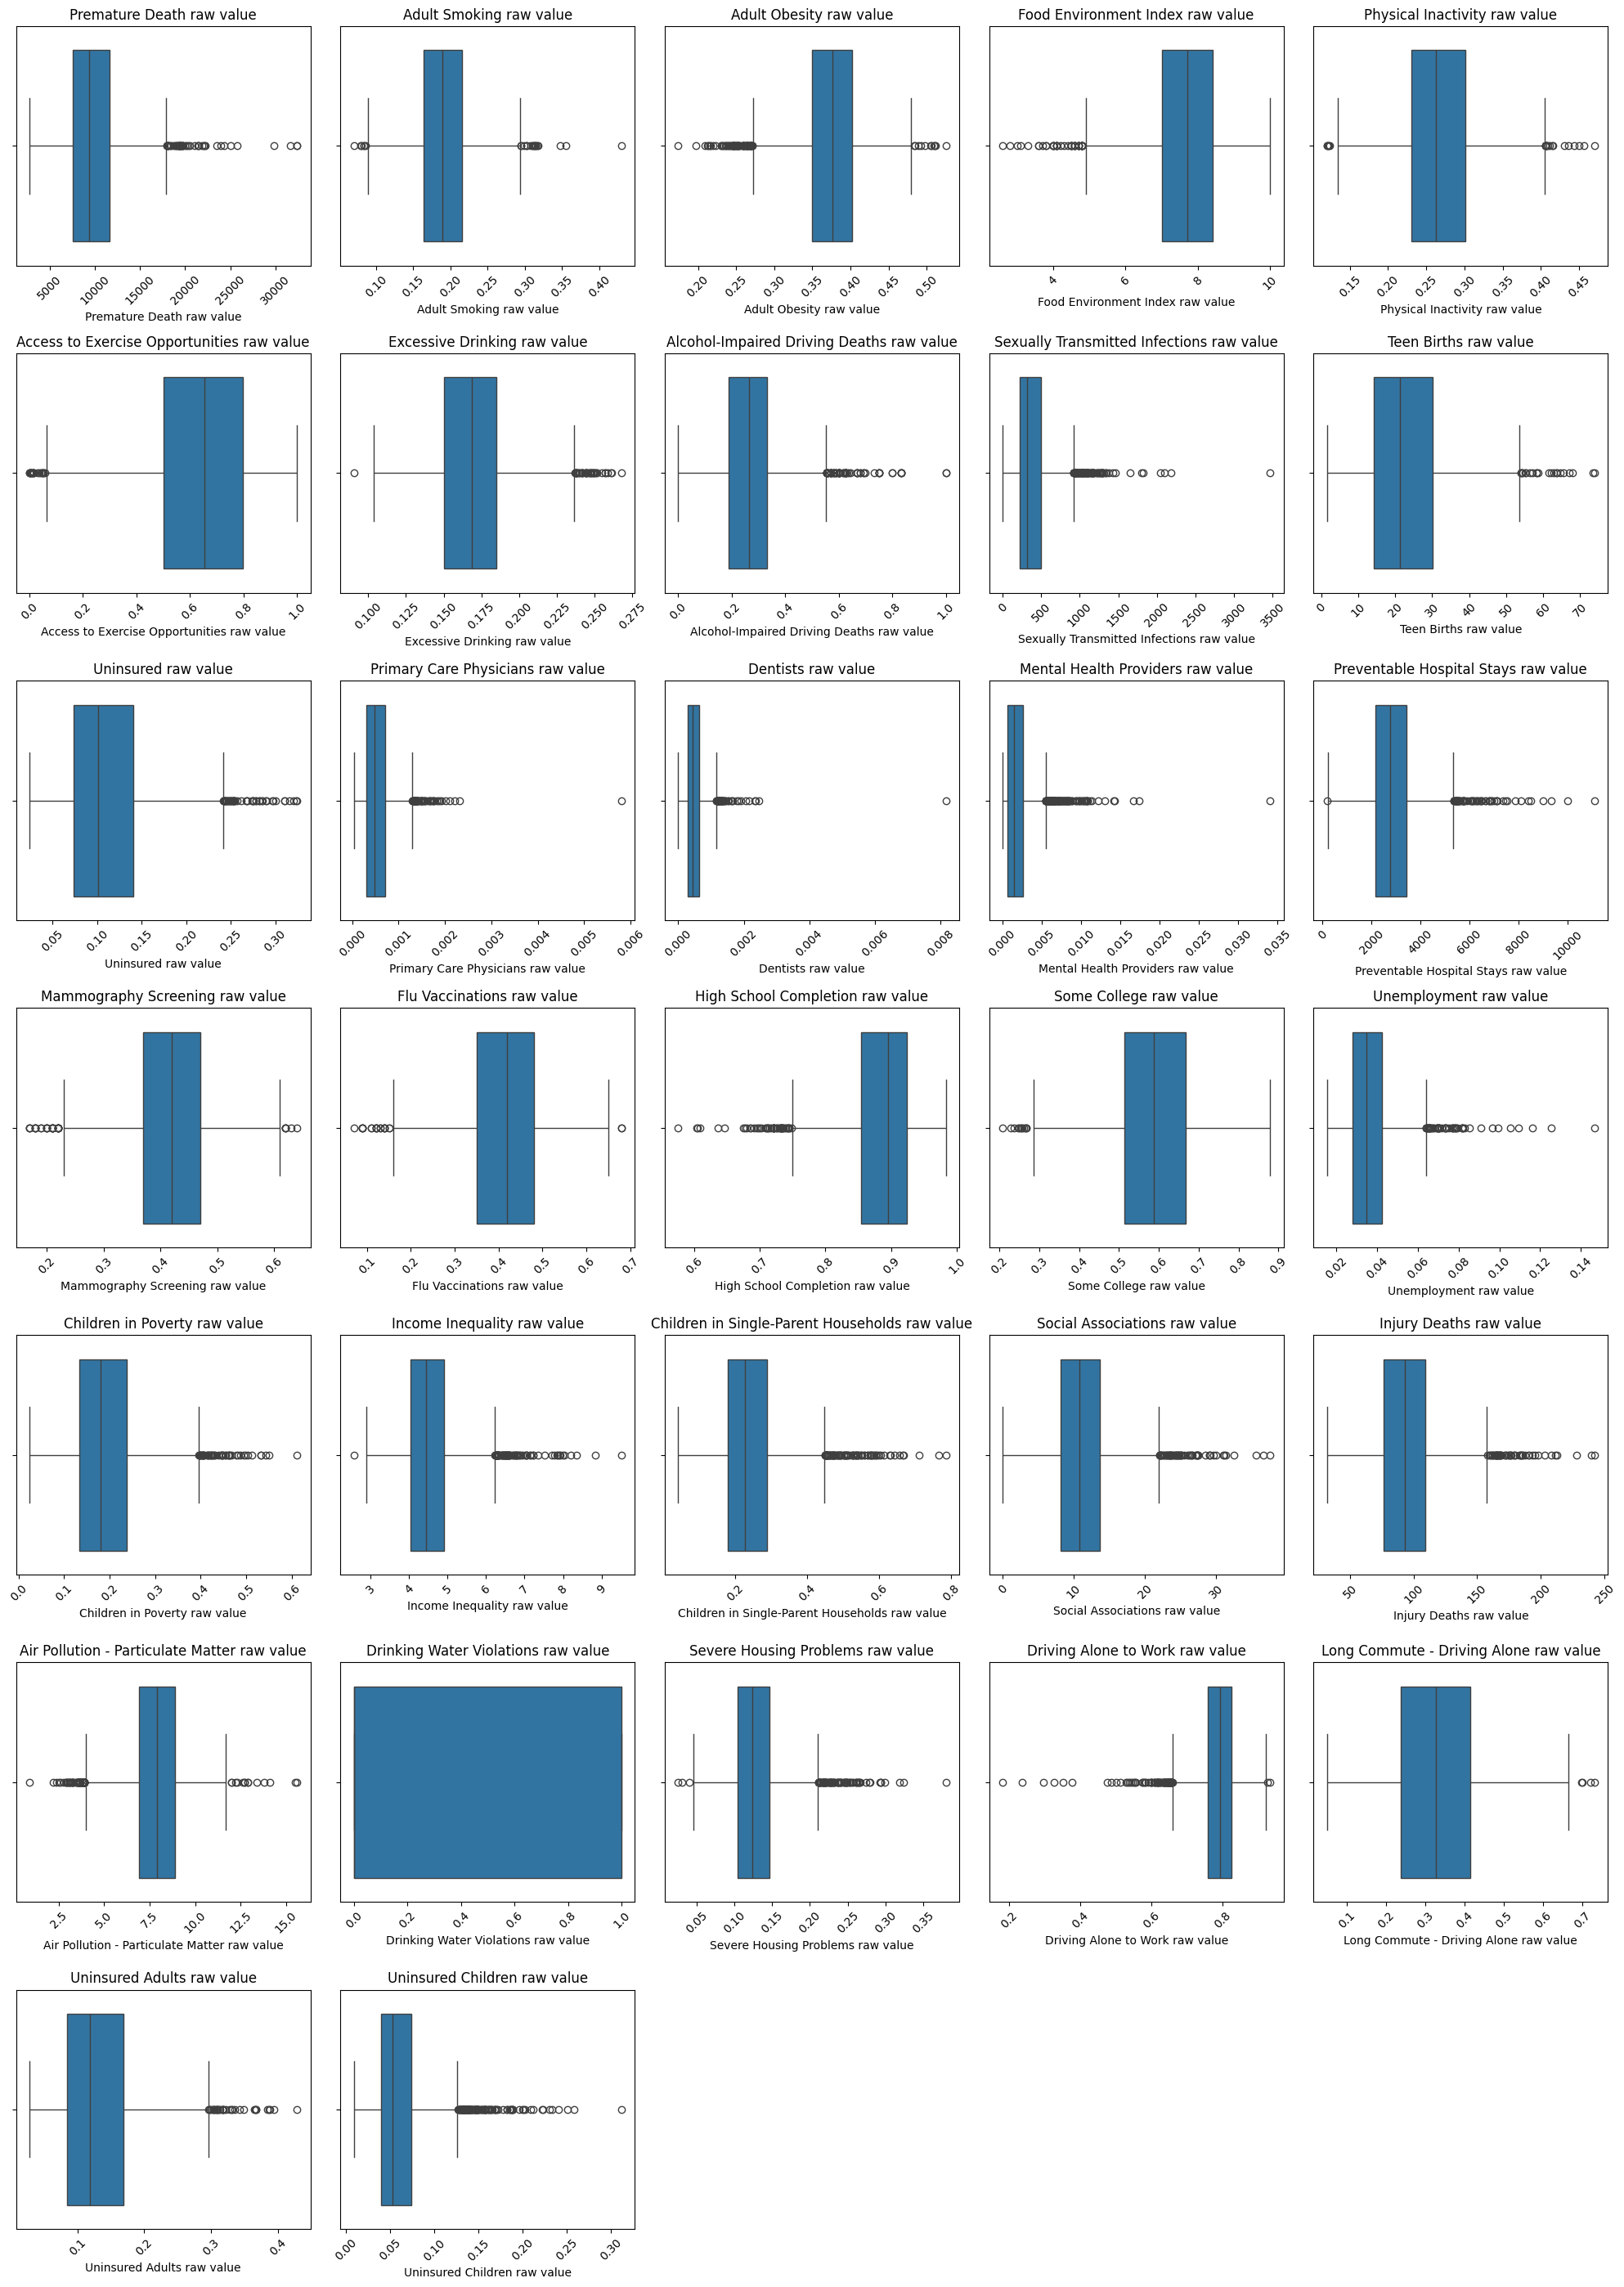

In [16]:
## Visualize outliers in all numerical variables
# Create subplot grid

n_cols = 5  # Columns per row
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 4*n_rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=analytical_dataset[col])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation matrices

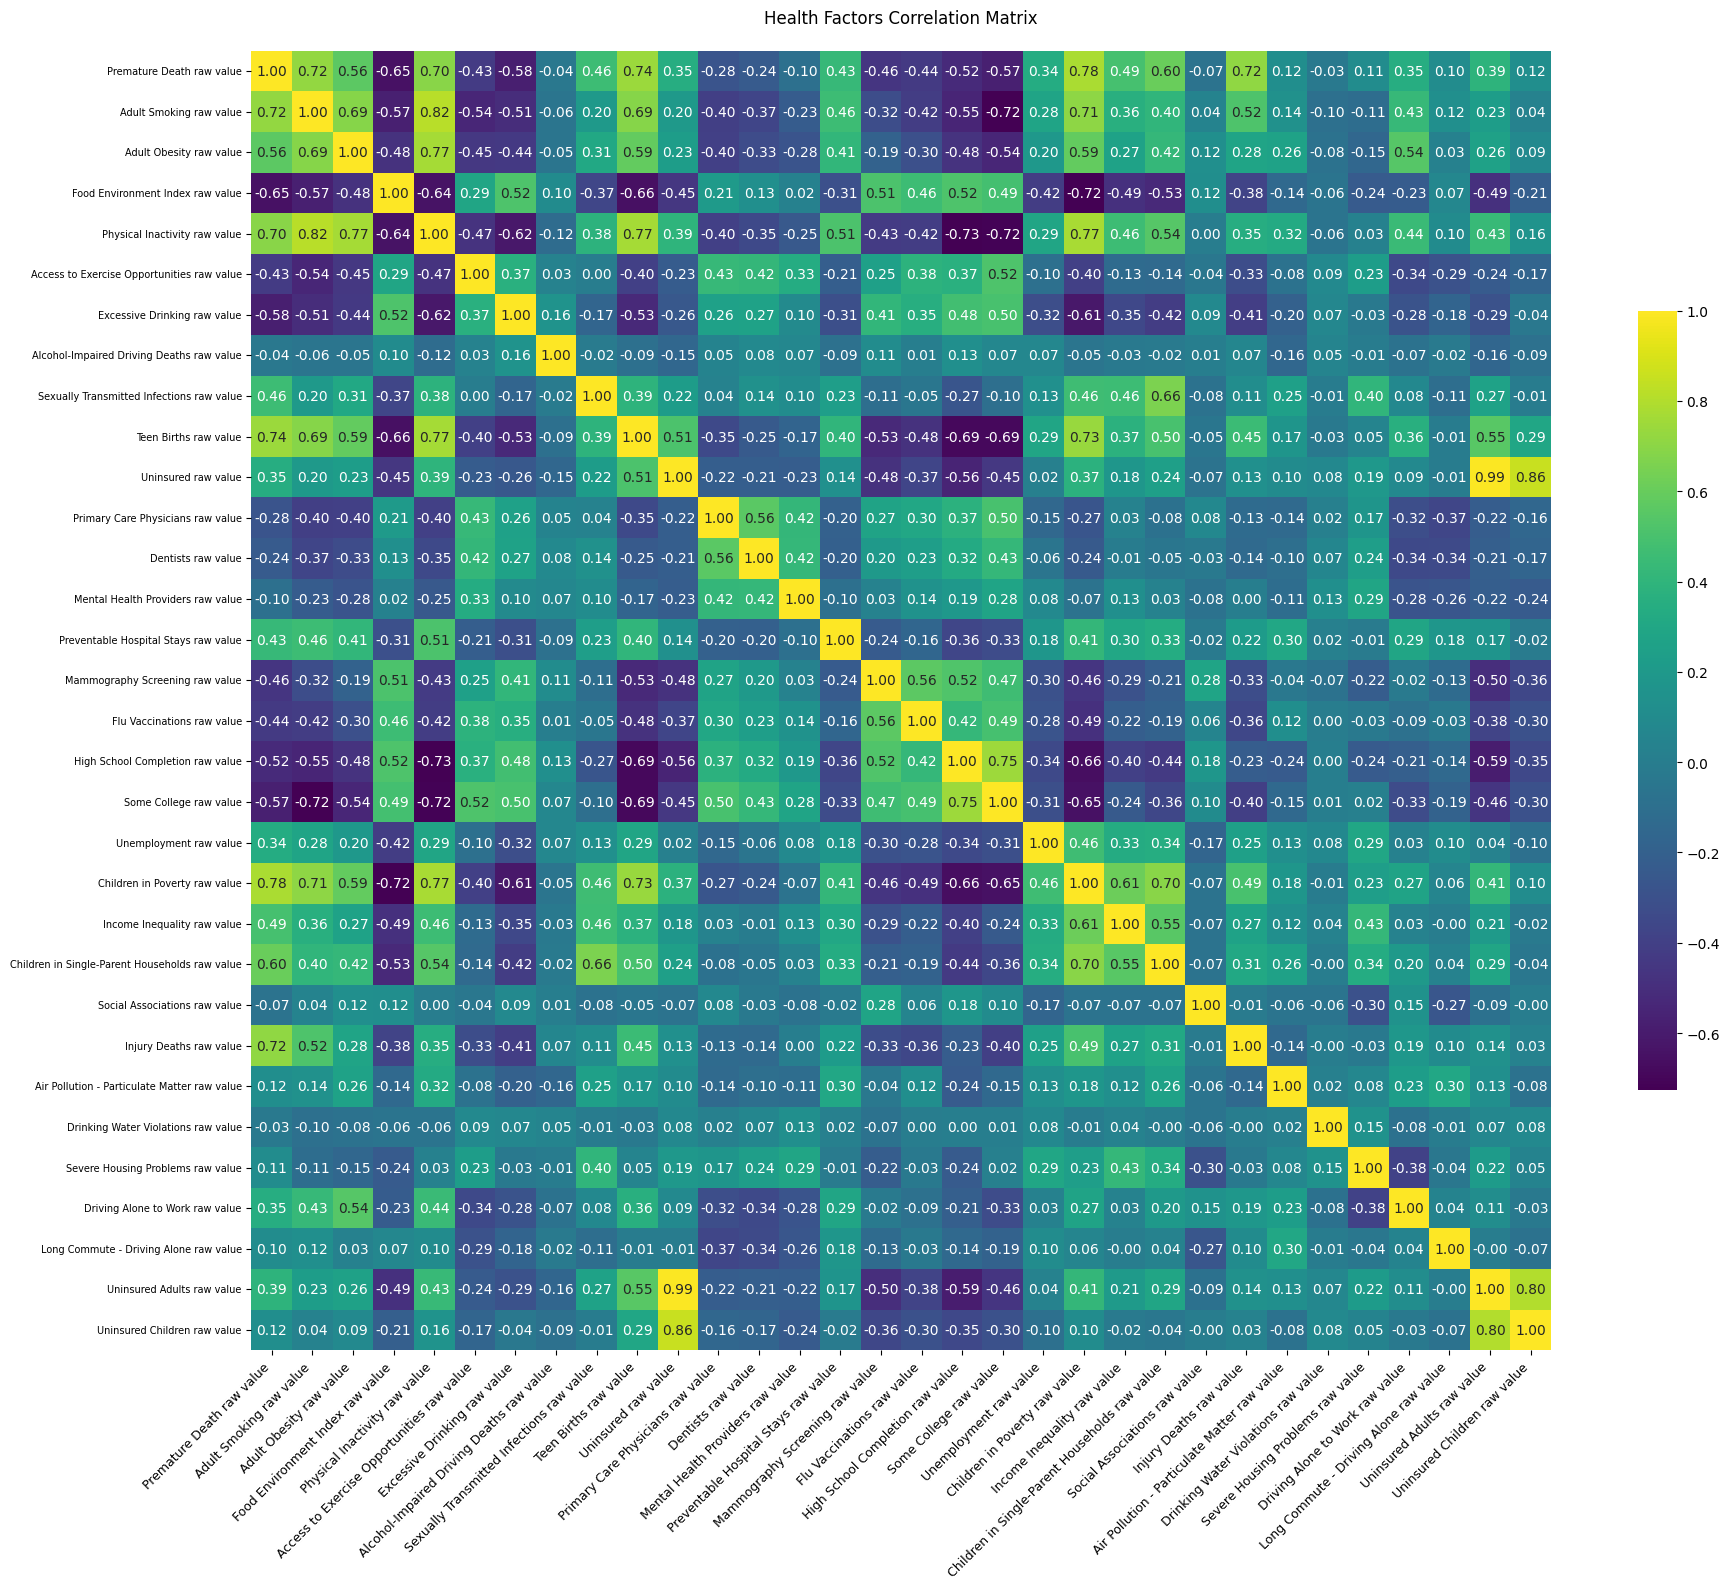

In [17]:
## Correlation matrix for ADS
corr_matrix = analytical_dataset[numeric_columns].corr()
# Create compact visualization
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix,
            cmap='viridis',
            annot=True,
            fmt='.2f',
            annot_kws={'size': 10},
            square=True,
            cbar_kws={'shrink': 0.6})
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=7)
plt.title('Health Factors Correlation Matrix', pad=20, fontsize=12)
plt.tight_layout()
plt.show()

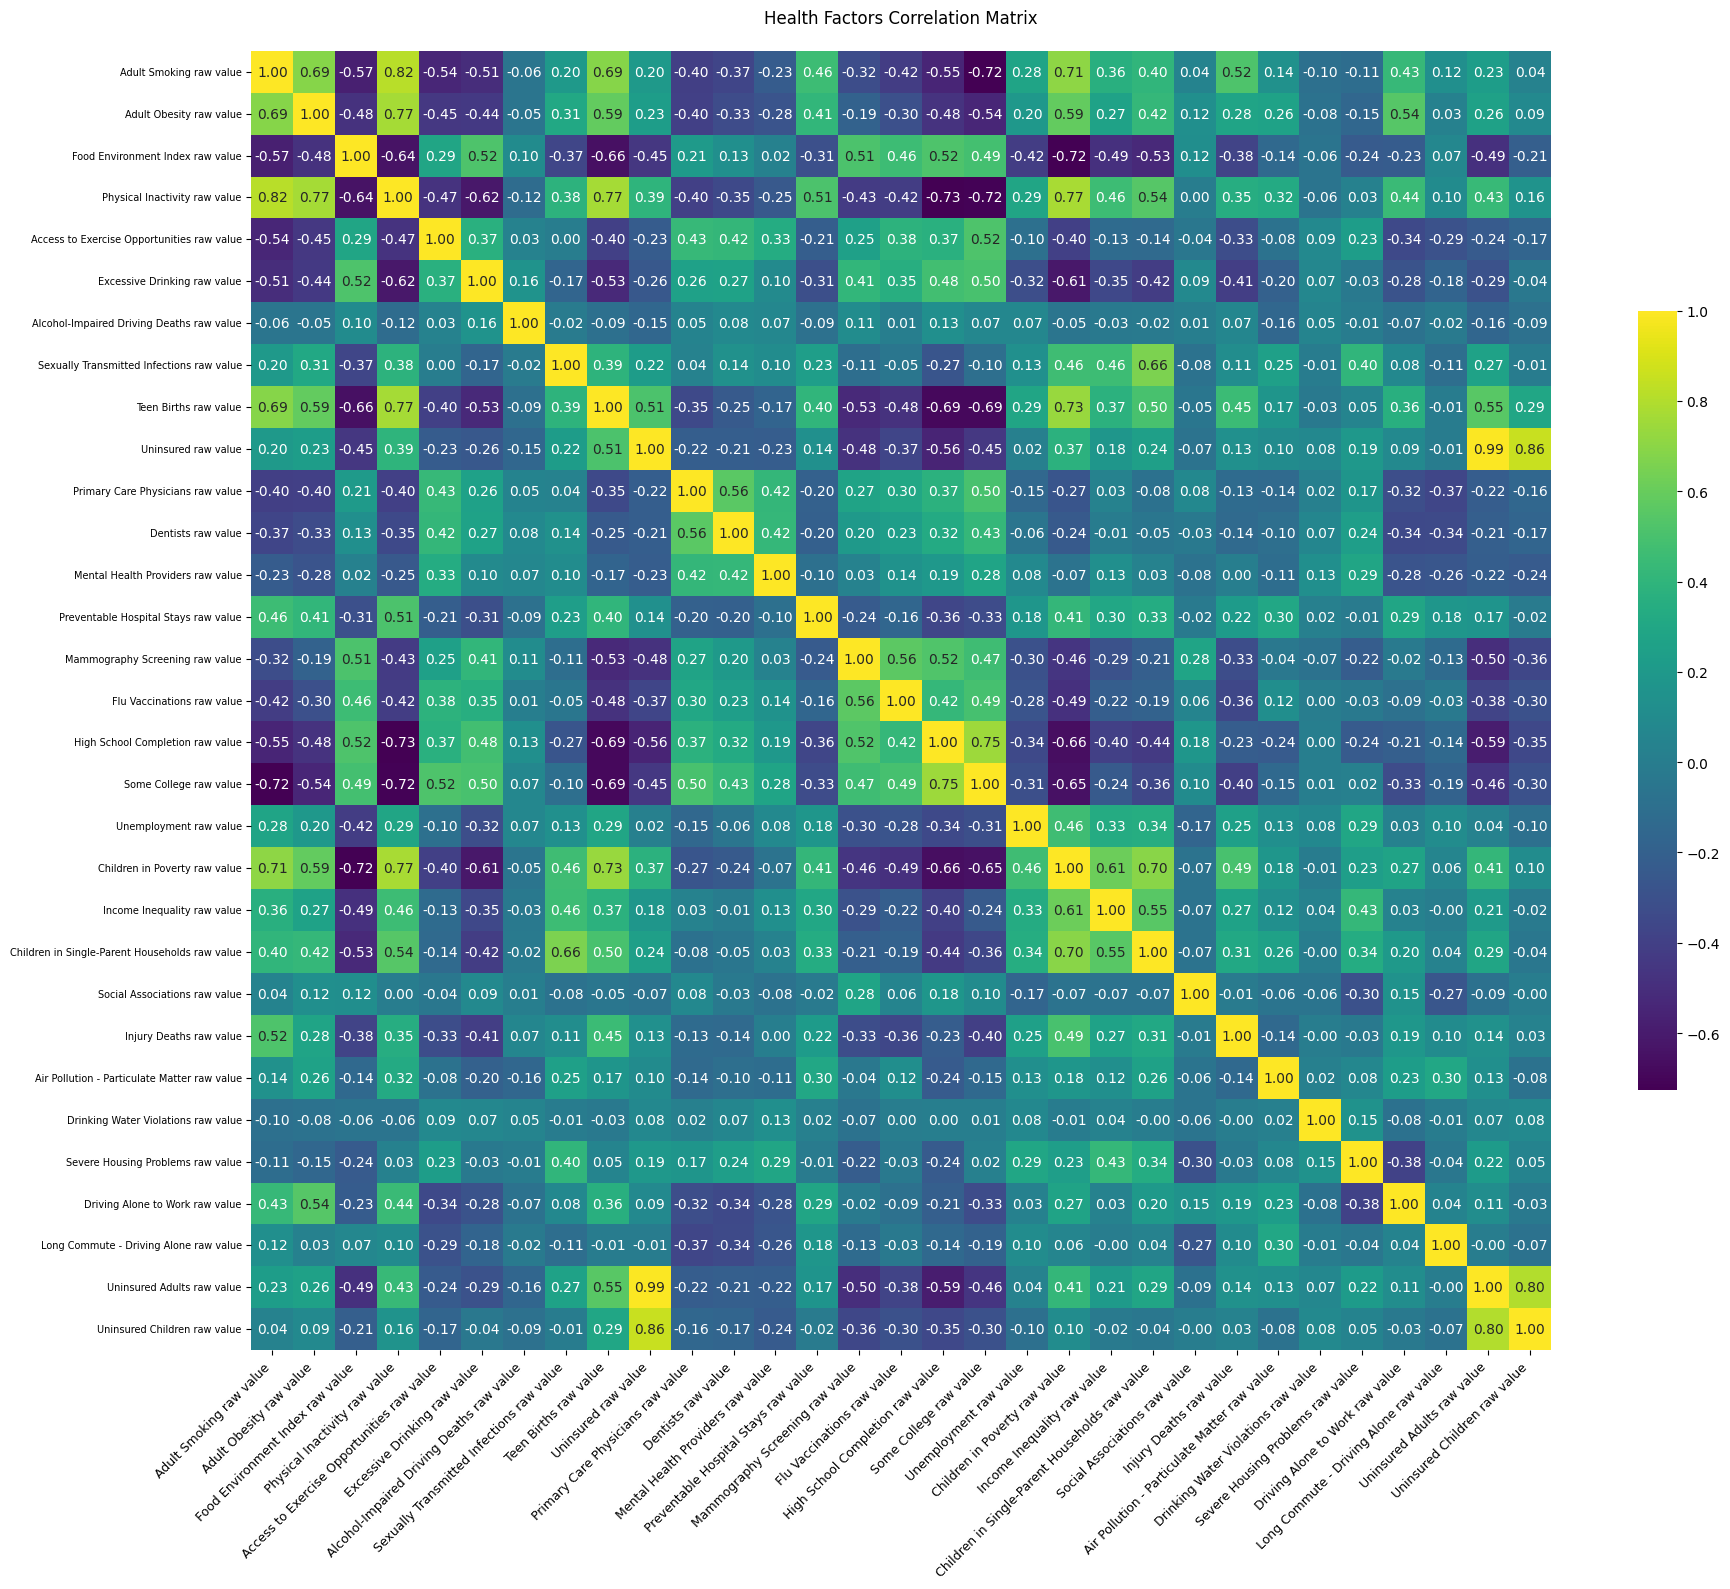

In [18]:
## Correlation matrix for AFS
corr_matrix_fs = analytical_featureset[feature_columns].corr()
# Create compact visualization
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_fs,
            cmap='viridis',
            annot=True,
            fmt='.2f',
            annot_kws={'size': 10},
            square=True,
            cbar_kws={'shrink': 0.6})
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=7)
plt.title('Health Factors Correlation Matrix', pad=20, fontsize=12)
plt.tight_layout()
plt.show()

### Preparation for Modelling

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from scipy.spatial.distance import cosine

In [22]:
# 2. Feature Selection based on Correlation
target = 'Premature Death raw value'
corr_matrix_final = analytical_dataset.corr(numeric_only=True)
premature_death_corr = corr_matrix_final[target].abs()
features_chosen_final = premature_death_corr[premature_death_corr > 0.6].index.tolist()
features_chosen_final.remove(target)
features_chosen_final

['Adult Smoking raw value',
 'Food Environment Index raw value',
 'Physical Inactivity raw value',
 'Teen Births raw value',
 'Children in Poverty raw value',
 'Children in Single-Parent Households raw value',
 'Injury Deaths raw value']

In [23]:
# 3. Multicollinearity Handling
def calculate_vif(df):
    corr_matrix = df.corr()
    return pd.DataFrame({
        'Feature': corr_matrix.columns,
        'VIF': [1/(1 - corr_matrix[col].pow(2).sum()) for col in corr_matrix.columns]
    })

vif_data = calculate_vif(analytical_dataset[features_chosen_final])
features_chosen_final = vif_data[vif_data['VIF'] <= 5]['Feature'].tolist()
features_chosen_final

['Adult Smoking raw value',
 'Food Environment Index raw value',
 'Physical Inactivity raw value',
 'Teen Births raw value',
 'Children in Poverty raw value',
 'Children in Single-Parent Households raw value',
 'Injury Deaths raw value']

### Clustering

Text(0.5, 1.0, 'Optimal Cluster Determination')

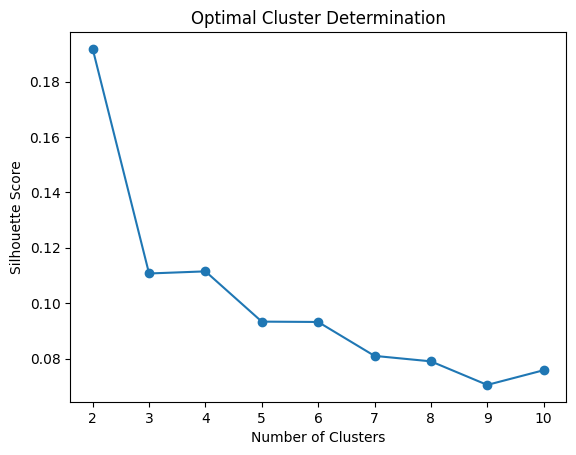

In [19]:
# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(analytical_dataset[numeric_columns].drop('Premature Death raw value', axis=1))

# Determine optimal clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot silhouette scores
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Cluster Determination")

######The choice of k=2 as the optimal number of clusters is justified by several key observations from the silhouette score analysis:

**Statistical Evidence**
The silhouette score at k=2 is approximately 0.19, which is significantly higher than all other k values tested. This score represents the best trade-off between cluster cohesion and separation among all options from k=2 to k=10.

**Score Pattern Analysis**
The silhouette scores show a clear pattern:



*   The highest score occurs at k=2 (≈0.19)
*   There is a sharp drop between k=2 and k=3 (from 0.19 to 0.12)
*   After k=3, the scores continue to decline gradually, but much less dramatically
*   The scores stabilize at lower values (around 0.08) for higher k values

**Mathematical Interpretation**

The higher silhouette score at k=2 indicates that:
The data points are more similar to other points in their own cluster.
The data points are well-separated from points in the other cluster.
The clustering solution is more robust and meaningful compared to solutions with more clusters.

This clear "elbow" in the plot at k=2, combined with the highest silhouette score, provides strong evidence that two clusters represent the most natural grouping structure in this county-level dataset.

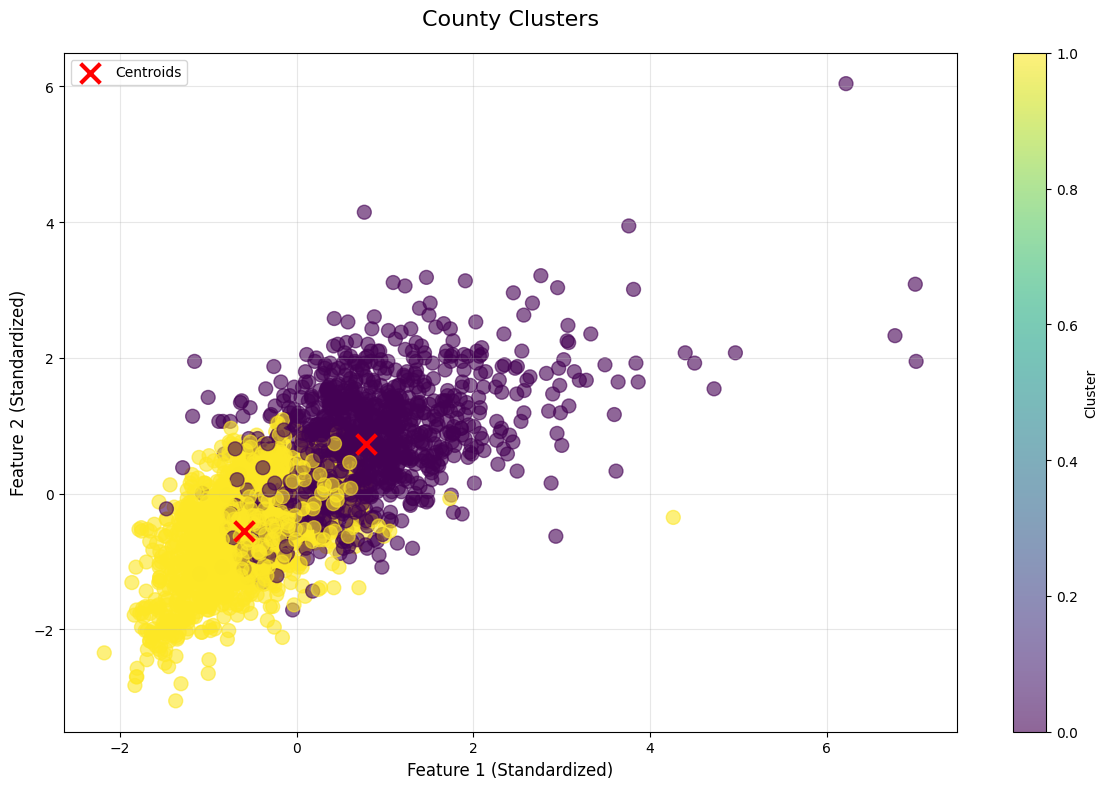

In [51]:
# Assuming your data is in a DataFrame called 'county_data'
def plot_county_clusters(df, numeric_columns):
    # Scale the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[numeric_columns])

    # Perform K-means clustering with optimal k=2
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Reduce dimensionality to 2D for visualization using first two features
    plt.figure(figsize=(12, 8))

    # Create scatter plot
    scatter = plt.scatter(scaled_data[:, 0], scaled_data[:, 1],
                         c=clusters, cmap='viridis',
                         alpha=0.6, s=100)

    # Plot cluster centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1],
               c='red', marker='x', s=200, linewidths=3,
               label='Centroids')

    # # Add county names as annotations
    # for i, county in enumerate(df.index):
    #     plt.annotate(county, (scaled_data[i, 0], scaled_data[i, 1]),
    #                 xytext=(5, 5), textcoords='offset points',
    #                 fontsize=8, alpha=0.7)

    # Customize the plot
    plt.title('County Clusters', fontsize=16, pad=20)
    plt.xlabel(f'Feature 1 (Standardized)', fontsize=12)
    plt.ylabel(f'Feature 2 (Standardized)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add colorbar
    plt.colorbar(scatter, label='Cluster')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_county_clusters(analytical_dataset, numeric_columns)

### Supervised Models

In [29]:
# 5. Model Development
# Prepare data
X = analytical_dataset[features_chosen_final]
y = analytical_dataset[target]
X = SimpleImputer(strategy='median').fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression with Lasso
lasso_model = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=np.logspace(-4, 0, 20), cv=5)
)
lasso_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         cv=5))])

In [30]:
# Random Forest with Permutation Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

In [52]:
def evaluate_model(model, X, y):
    pred = model.predict(X)
    return {
        'RMSE': np.sqrt(mean_squared_error(y, pred)),
        'R2': r2_score(y, pred)
    }

lasso_metrics = evaluate_model(lasso_model, X_test, y_test)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

# Permutation Importance for Random Forest
rf_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10)

### Results Interpretation

In [36]:
print("Lasso Regression Metrics:")
print(f"RMSE: {lasso_metrics['RMSE']:.1f}, R²: {lasso_metrics['R2']:.2f}")

print("\nRandom Forest Metrics:")
print(f"RMSE: {rf_metrics['RMSE']:.1f}, R²: {rf_metrics['R2']:.2f}")

print("\nTop 7 Important Features:")
importance_df = pd.DataFrame({
    'Feature': features_chosen_final,
    'Importance': rf_importance.importances_mean
}).sort_values('Importance', ascending=False).head(10)
print(importance_df)

# Model Justification
if ((rf_metrics['R2'] > lasso_metrics['R2']) and (rf_metrics['RMSE'] > lasso_metrics['RMSE'])):
    print("\nRandom Forest performs better due to:")
    print("- Ability to capture non-linear relationships")
    print("- Handling of multicollinearity through feature importance")
else:
    print("\nLasso Regression performs better due to:")
    print("- Effective regularization of correlated features")
    print("- Better interpretability of linear relationships")

Lasso Regression Metrics:
RMSE: 1314.8, R²: 0.83

Random Forest Metrics:
RMSE: 1302.2, R²: 0.83

Top 7 Important Features:
                                          Feature  Importance
6                         Injury Deaths raw value    0.299965
4                   Children in Poverty raw value    0.172627
3                           Teen Births raw value    0.061561
5  Children in Single-Parent Households raw value    0.033176
2                   Physical Inactivity raw value    0.018468
1                Food Environment Index raw value    0.013890
0                         Adult Smoking raw value    0.009211

Lasso Regression performs better due to:
- Effective regularization of correlated features
- Better interpretability of linear relationships


### Analysis for Allegheny county

In [44]:
# Filter for Allegheny County (FIPS Code for Allegheny County: 42003)
allegheny_data = analytical_dataset[analytical_dataset['Name'] == 'Allegheny County']

# Extract features used in the Lasso regression model
allegheny_features = [
    'Adult Smoking raw value',
    'Physical Inactivity raw value',
    'Food Environment Index raw value',
    'Injury Deaths raw value',
    'Children in Poverty raw value',
    'Children in Single-Parent Households raw value',
    'Teen Births raw value'
]

# Calculate national averages for comparison
national_averages = analytical_dataset[allegheny_features].mean()

allegheny_data.head()

,5-digit FIPS Code,State Abbreviation,Name,County Clustered (Yes=1/No=0),Premature Death raw value,Adult Smoking raw value,Adult Obesity raw value,Food Environment Index raw value,Physical Inactivity raw value,Access to Exercise Opportunities raw value,...,Children in Single-Parent Households raw value,Social Associations raw value,Injury Deaths raw value,Air Pollution - Particulate Matter raw value,Drinking Water Violations raw value,Severe Housing Problems raw value,Driving Alone to Work raw value,Long Commute - Driving Alone raw value,Uninsured Adults raw value,Uninsured Children raw value
2287,42003,PA,Allegheny County,1.0,8183.722457,0.16,0.316,8.3,0.213,0.931215,...,0.263953,11.267355,110.43078,14.1,1.0,0.130293,0.649991,0.385,0.057036,0.026142


In [45]:
# Compare Allegheny County's values to national averages
recommendations = []
for feature in allegheny_features:
    county_value = allegheny_data[feature].values[0]
    national_avg = national_averages[feature]

    if feature == 'Food Environment Index raw value':  # Higher is better for this feature
        if county_value < national_avg:
            recommendations.append(
                f"Improve {feature.replace('raw value', '').strip()} "
                f"(Current: {county_value:.2f}, National Avg: {national_avg:.2f})"
            )
    else:  # Lower is better for other features
        if county_value > national_avg:
            recommendations.append(
                f"Reduce {feature.replace('raw value', '').strip()} "
                f"(Current: {county_value:.2f}, National Avg: {national_avg:.2f})"
            )

# Display recommendations
print("Recommendations to Reduce Premature Death in Allegheny County:")
for rec in recommendations:
    print(f"- {rec}")

Recommendations to Reduce Premature Death in Allegheny County:
- Reduce Injury Deaths (Current: 110.43, National Avg: 94.57)
- Reduce Children in Single-Parent Households (Current: 0.26, National Avg: 0.24)
